In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/01/2018 16:34:20 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/01/2018 16:34:21 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/01/2018 16:34:23 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


In [6]:
dtfa.normalize_activations()

[10.872537612915039, 9.790372848510742, 8.538802146911621]

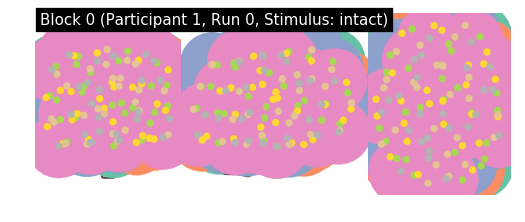

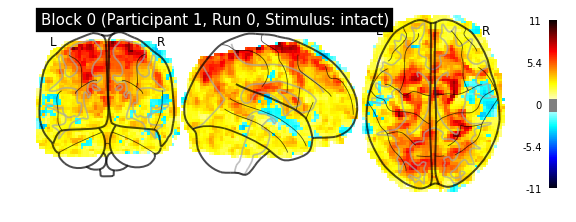

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:674: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
06/01/2018 16:13:50 Reconstruction Error (Frobenius Norm): 5.08479688e+03 out of 5.08479639e+03


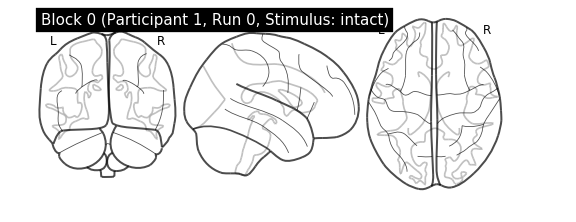

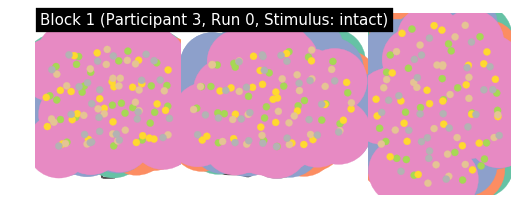

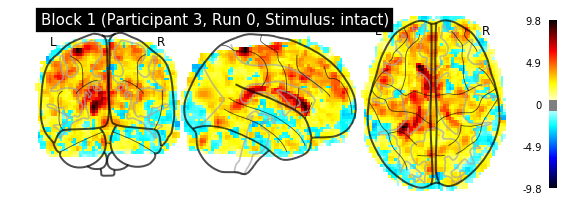

06/01/2018 16:14:17 Reconstruction Error (Frobenius Norm): 5.19534277e+03 out of 5.19534277e+03


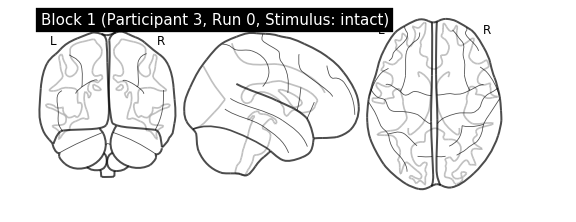

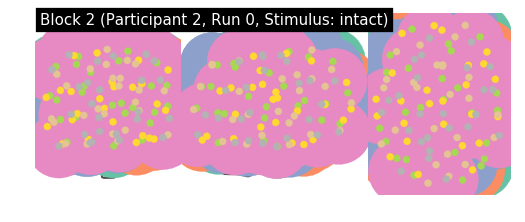

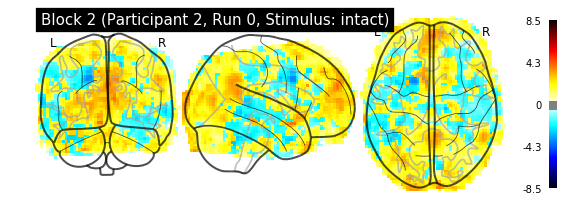

06/01/2018 16:14:43 Reconstruction Error (Frobenius Norm): 5.19534277e+03 out of 5.19534277e+03


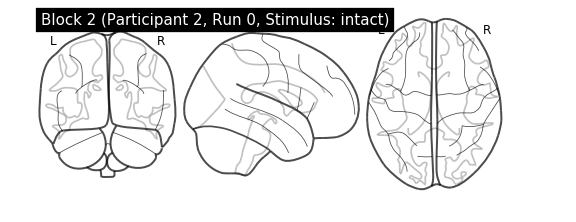

In [7]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [8]:
losses = dtfa.train(num_steps=500, learning_rate=1e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=300, use_cuda=True, checkpoint_steps=10, blocks_batch_size=8, patience=20)

06/01/2018 16:14:43 [Epoch 1] (677ms) Posterior free-energy 3.94354647e+10
06/01/2018 16:14:43 Saving checkpoint...
06/01/2018 16:14:44 [Epoch 2] (539ms) Posterior free-energy 3.81860168e+10
06/01/2018 16:14:45 [Epoch 3] (550ms) Posterior free-energy 3.87746529e+10
06/01/2018 16:14:45 [Epoch 4] (537ms) Posterior free-energy 3.47398840e+10
06/01/2018 16:14:46 [Epoch 5] (539ms) Posterior free-energy 3.26824858e+10
06/01/2018 16:14:46 [Epoch 6] (535ms) Posterior free-energy 3.01868831e+10
06/01/2018 16:14:47 [Epoch 7] (540ms) Posterior free-energy 2.61169725e+10
06/01/2018 16:14:47 [Epoch 8] (543ms) Posterior free-energy 2.52133335e+10
06/01/2018 16:14:48 [Epoch 9] (546ms) Posterior free-energy 2.47702528e+10
06/01/2018 16:14:48 [Epoch 10] (535ms) Posterior free-energy 2.33414103e+10
06/01/2018 16:14:49 [Epoch 11] (545ms) Posterior free-energy 1.90041764e+10
06/01/2018 16:14:49 Saving checkpoint...
06/01/2018 16:14:50 [Epoch 12] (593ms) Posterior free-energy 1.40429210e+10
06/01/2018 16:1

Epoch    87: reducing learning rate of group 0 to 1.0000e-03.


06/01/2018 16:15:32 [Epoch 89] (567ms) Posterior free-energy 3.95335398e+09
06/01/2018 16:15:33 [Epoch 90] (559ms) Posterior free-energy 3.92695757e+09
06/01/2018 16:15:34 [Epoch 91] (577ms) Posterior free-energy 3.92168550e+09
06/01/2018 16:15:34 Saving checkpoint...
06/01/2018 16:15:34 [Epoch 92] (586ms) Posterior free-energy 3.97776230e+09
06/01/2018 16:15:35 [Epoch 93] (545ms) Posterior free-energy 3.90163917e+09
06/01/2018 16:15:35 [Epoch 94] (546ms) Posterior free-energy 3.95096832e+09
06/01/2018 16:15:36 [Epoch 95] (583ms) Posterior free-energy 3.95065549e+09
06/01/2018 16:15:36 [Epoch 96] (573ms) Posterior free-energy 3.95225446e+09
06/01/2018 16:15:37 [Epoch 97] (546ms) Posterior free-energy 3.92621850e+09
06/01/2018 16:15:37 [Epoch 98] (551ms) Posterior free-energy 3.90490726e+09
06/01/2018 16:15:38 [Epoch 99] (551ms) Posterior free-energy 3.91306445e+09
06/01/2018 16:15:39 [Epoch 100] (543ms) Posterior free-energy 3.89966080e+09
06/01/2018 16:15:39 [Epoch 101] (547ms) Poster

Epoch   108: reducing learning rate of group 0 to 1.0000e-04.


06/01/2018 16:15:44 [Epoch 110] (560ms) Posterior free-energy 3.90336614e+09
06/01/2018 16:15:45 [Epoch 111] (552ms) Posterior free-energy 3.98925210e+09
06/01/2018 16:15:45 Saving checkpoint...
06/01/2018 16:15:45 [Epoch 112] (550ms) Posterior free-energy 3.90476032e+09
06/01/2018 16:15:46 [Epoch 113] (608ms) Posterior free-energy 3.88581683e+09
06/01/2018 16:15:46 [Epoch 114] (567ms) Posterior free-energy 3.93644902e+09
06/01/2018 16:15:47 [Epoch 115] (581ms) Posterior free-energy 3.95092480e+09
06/01/2018 16:15:48 [Epoch 116] (584ms) Posterior free-energy 3.89734861e+09
06/01/2018 16:15:48 [Epoch 117] (550ms) Posterior free-energy 3.91196698e+09
06/01/2018 16:15:49 [Epoch 118] (541ms) Posterior free-energy 3.99291366e+09
06/01/2018 16:15:49 [Epoch 119] (549ms) Posterior free-energy 3.99016013e+09
06/01/2018 16:15:50 [Epoch 120] (544ms) Posterior free-energy 3.89168666e+09
06/01/2018 16:15:50 [Epoch 121] (547ms) Posterior free-energy 3.97742438e+09
06/01/2018 16:15:50 Saving checkpoi

Epoch   129: reducing learning rate of group 0 to 5.0000e-05.


06/01/2018 16:15:56 [Epoch 131] (572ms) Posterior free-energy 3.90496000e+09
06/01/2018 16:15:56 Saving checkpoint...
06/01/2018 16:15:56 [Epoch 132] (548ms) Posterior free-energy 4.01368422e+09
06/01/2018 16:15:57 [Epoch 133] (548ms) Posterior free-energy 3.92981018e+09
06/01/2018 16:15:57 [Epoch 134] (551ms) Posterior free-energy 3.89698739e+09
06/01/2018 16:15:58 [Epoch 135] (551ms) Posterior free-energy 3.98450074e+09
06/01/2018 16:15:59 [Epoch 136] (543ms) Posterior free-energy 3.90932122e+09
06/01/2018 16:15:59 [Epoch 137] (546ms) Posterior free-energy 3.93953203e+09
06/01/2018 16:16:00 [Epoch 138] (548ms) Posterior free-energy 3.95209907e+09
06/01/2018 16:16:00 [Epoch 139] (545ms) Posterior free-energy 3.96286106e+09
06/01/2018 16:16:01 [Epoch 140] (565ms) Posterior free-energy 3.89295898e+09
06/01/2018 16:16:01 [Epoch 141] (546ms) Posterior free-energy 3.93452877e+09
06/01/2018 16:16:01 Saving checkpoint...
06/01/2018 16:16:02 [Epoch 142] (550ms) Posterior free-energy 3.9014016

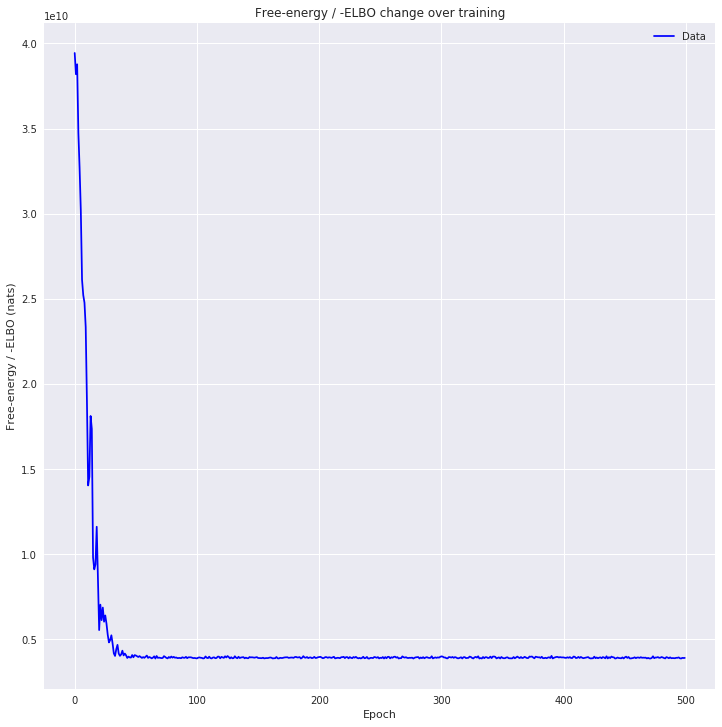

In [9]:
utils.plot_losses(losses)

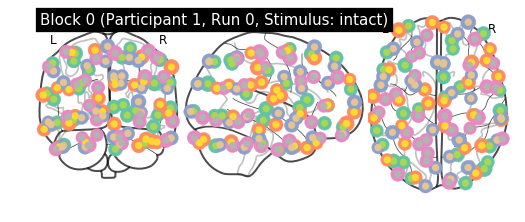

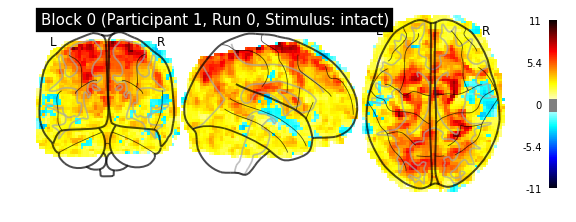

06/01/2018 16:19:50 Reconstruction Error (Frobenius Norm): 5.05480469e+03 out of 5.08479639e+03


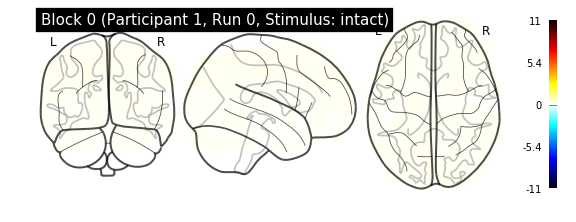

{'weights': 
 1.3494e-01  1.1496e-01  7.0464e-02  ...   1.3509e-01  1.0665e-01  1.6652e-01
 5.2185e-02 -2.8485e-02 -5.9492e-03  ...   1.2424e-03  2.5771e-02  1.8671e-02
-3.4030e-02 -7.4929e-04 -4.6514e-02  ...  -8.1227e-02 -5.4201e-02 -2.5083e-03
                ...                   ⋱                   ...                
 1.3995e-02 -3.6258e-03 -4.4842e-03  ...   8.0358e-02  4.2210e-02 -2.6040e-02
-5.1754e-02 -2.9450e-02 -4.5311e-02  ...   3.7944e-02 -3.8574e-02 -8.1519e-02
-5.0715e-02  3.8271e-02 -6.2145e-02  ...  -3.9948e-04 -1.4489e-02 -5.0934e-03
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatT

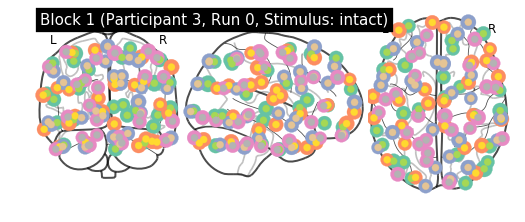

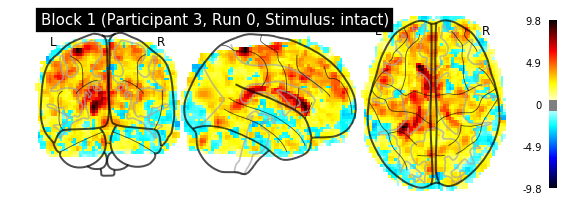

06/01/2018 16:20:17 Reconstruction Error (Frobenius Norm): 5.16641357e+03 out of 5.19534277e+03


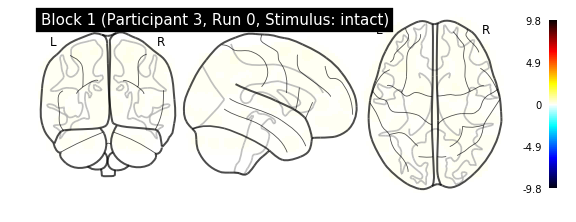

{'weights': 
 1.0447e-01  1.2903e-01  6.8275e-02  ...   1.0422e-01  9.9197e-02  4.3705e-02
-6.3317e-02  1.2319e-03 -5.8638e-02  ...   5.1697e-03 -4.5737e-02 -6.2130e-02
-5.6457e-02 -7.2126e-02 -6.4462e-02  ...  -6.3864e-02 -3.9181e-02 -8.5090e-02
                ...                   ⋱                   ...                
 9.0536e-02  1.6204e-03  1.0884e-02  ...   5.0417e-02  1.2331e-01  2.6670e-02
 1.4011e-02  4.7939e-02 -3.1384e-02  ...   7.4768e-02  5.9023e-02  8.8177e-02
 9.1784e-02  7.4604e-02  8.4768e-02  ...   4.5558e-02  1.4967e-01  6.4236e-02
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatT

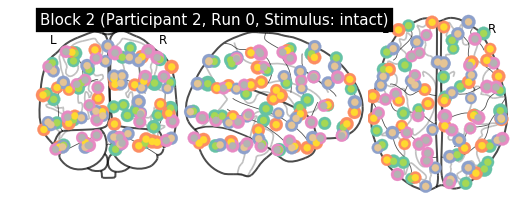

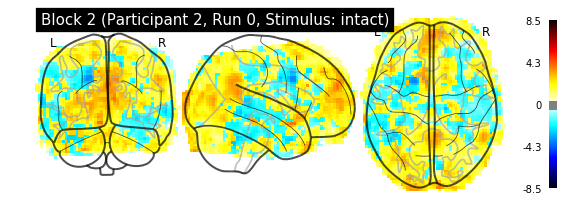

06/01/2018 16:20:45 Reconstruction Error (Frobenius Norm): 5.16629443e+03 out of 5.19534277e+03


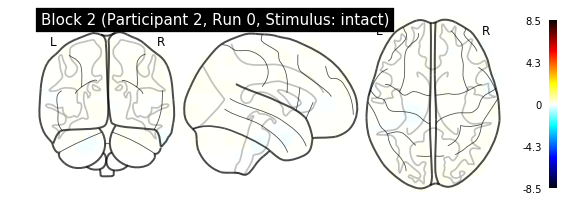

{'weights': 
 5.1480e-02 -2.7704e-02  5.0687e-02  ...   9.0890e-02  7.1057e-02  8.7876e-03
-1.2086e-02  5.0733e-02  2.0874e-02  ...  -3.0226e-02  4.4579e-02  1.7898e-02
 6.3172e-02  5.2082e-02  9.4453e-02  ...   6.9318e-02  8.3049e-02  1.1618e-01
                ...                   ⋱                   ...                
 6.6621e-02  9.3382e-02  1.1615e-01  ...   1.4028e-01  8.6038e-02  1.0092e-01
-4.0702e-02  3.6000e-02 -2.5473e-02  ...   3.2491e-02  1.3518e-02 -2.8116e-02
 1.0823e-02  2.4709e-02 -1.7701e-03  ...  -7.3433e-03  4.4819e-02  8.3513e-02
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatT

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [11]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


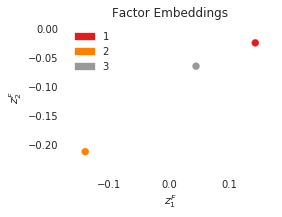

In [12]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


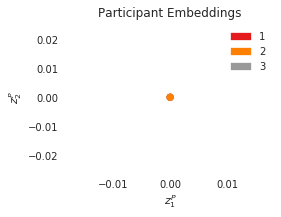

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


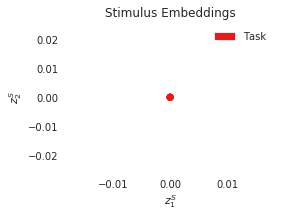

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)